y=Wx+b
J=1/m E(i=0,m) (ycap-y)^2
J=1/m E(i=0,m) (y-(Wx+b))^2 mean squared error
dJ/dW= -2/m E(i=0,m) (x(y-(mx+b)))
dJ/db= -2/m E(i=0,m) (y-(mx+b))
W=W-aplha*dW, b=b-alpha*db aplha=0.0001

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df=pd.read_csv('employee.csv')
print(df)

    Category  Age  Salary  Experience
0          C   29   42719           9
1          A   56   51228          18
2          C   19   84719          12
3          C   20   21991           1
4          A   54   60293          22
..       ...  ...     ...         ...
195        B   32   69165          10
196        C   45   54984          24
197        C   51   38772          38
198        B   19   73267           2
199        A   49   51735          20

[200 rows x 4 columns]


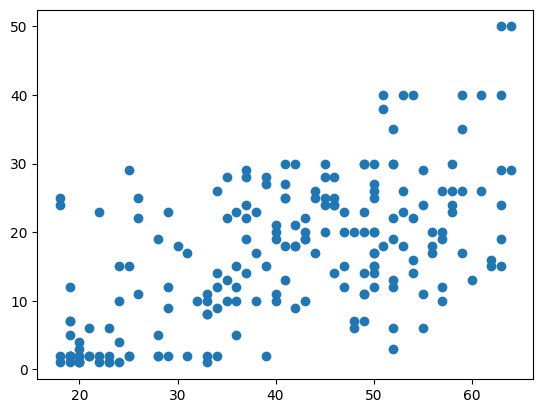

In [3]:
plt.scatter(df.Age,df.Experience)
plt.show()

In [4]:
def loss_fn(W,b,points):
    total_error=0
    for i in range(len(points)):
        x=points.iloc[i].Age #retriving data from Age column
        y=points.iloc[i].Salary #retriving data from Salary column
        total_error+=(y-(W*x+b)**2) #E(i=0,m) (y-(Wx+b))^2
    total_error/float(len(points)) #J=1/m E(i=0,m) (y-(Wx+b))^2

In [7]:
def gradient_descent(W_now,b_now,points,alpha):
    dW=0
    db=0
    m=len(points)
    for i in range(m):
        x=points.iloc[i].Age
        y=points.iloc[i].Experience
        dW=-(2/m)*x*(y-(W_now*x+b_now))
        db=-(2/m)*(y-(W_now*x+b_now))
    W=W_now-alpha*dW
    b=b_now-alpha*db
    return W,b

In [8]:
W=0
b=0
alpha=0.0001 #learning rate
epochs=1000 #pass through data

for i in range (epochs):
    if i%50==0:
        print(f"Epoch: {i}")
    W,b=gradient_descent(W,b,df,alpha) #to get better estimate of m & b
print(W,b)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
Epoch: 900
Epoch: 950
0.3711615456732765 0.007574725421903596


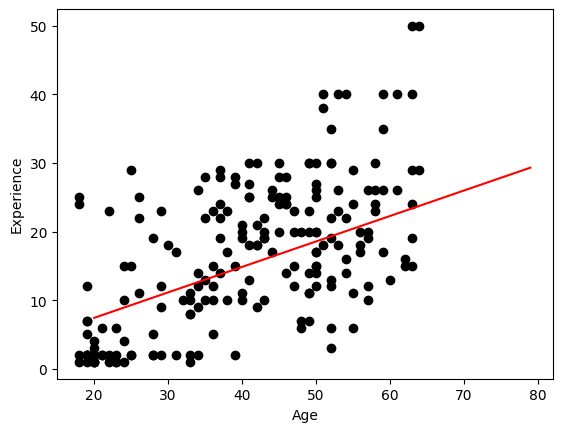

In [10]:
plt.scatter(df.Age,df.Experience, color="black")
plt.xlabel("Age")
plt.ylabel("Experience")
plt.plot(list(range(20,80)),[W*x+b for x in range(20,80)],color="red")
plt.show()